# U19951 Mathematics for Computer Science
## Assignment 2 - Digital Artefact

## Task 1 - Linear Algebra [55 Marks]

### Question 1.1

Given matrix equation:

$$
\begin{bmatrix}
a & b & c \\
d & c & f
\end{bmatrix}
\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
= \mathbf{v}
$$

#### 1.1 a) [Manual Solution] - 5 Marks

Calculate **v** showing full working, where \(a, b, c, d, e, f\) are the **last 6 numbers of your student ID**. [5 Marks] 

#### 1.1 a) Solution
Student ID: 100146821

Let \(a = 1, b = 4, c = 6, d = 8, e = 2, f = 1\)

Then:
$$
\begin{bmatrix}
1 & 4 & 6 \\
8 & 2 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
=
\begin{bmatrix}
1(1) + 4(2) + 6(3) \\
8(1) + 2(2) + 1(3)
\end{bmatrix}
=
\begin{bmatrix}
1 + 8 + 18 \\
8 + 4 + 3
\end{bmatrix}
=
\begin{bmatrix}
27 \\
15
\end{bmatrix}
$$

Therefore,

$$
\mathbf{v} = \begin{bmatrix} 27 \\ 15 \end{bmatrix}
$$

#### 1.1b) [Python Solution] - 5 Marks


Confirm your answer for **v** using NumPy - [5 Marks]


In [ ]:
#### 1.1b) Solution

import numpy as np

# Student ID: 146821
# Extracted values
a = 1
b = 4
c = 6
d = 8
e = 2

# Matrix and vector
A = np.array([[a, b, c], [d, e, a]])

x = np.array([1, 2, 3]) # column vecotr

# Matrix-vector multiplication
v = A.dot(x)
print("v = ", v)


## Question 1.2

Consider each pixel location of an image represented as a vector v=(𝑥𝑥,𝑦𝑦,1)𝑇𝑇, where an extra 
dimension has been added for convenience of operator combinations (these are also referred to as 
homogeneous coordinates). 
We can use matrices to perform operations on these pixels to geometrically distort or correct images. 
Scaling, rotation, translation and shear operations are referred to as affine transformations. Table 1 
shows the general matrix forms for scaling and translating pixel locations. 

 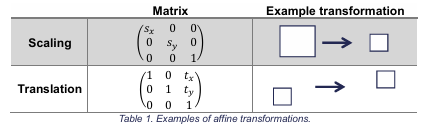

Consider two images of Canterbury at different points in time (Figure 1). We can choose corresponding 
pairs of pixels from image features that should line up – in this case, road junctions that have stayed the 
same during that time. 

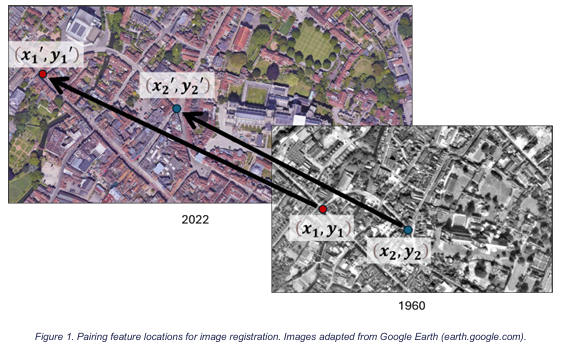




## 1.2a) [Manual Solution]
### Explanation

We are given two pixel pairs from two different images. We will calculate the scaling factors \( a \) and \( b \) based on the transformation equations using the given pixel coordinates. The transformation includes scaling and translation, which are represented by the following matrix:

$$
M = \begin{bmatrix}
a & 0 & c \\
0 & b & d \\
0 & 0 & 1
\end{bmatrix}
$$

Here, \( a \) and \( b \) are the scaling factors for the x and y dimensions, and \( c \) and \( d \) are the translation factors. Our goal is to calculate \( a \) and \( b \).

### Given:
Two pairs of pixel coordinates:

1. \( (x_1, y_1) \) and \( (x_2, y_2) \) in the first image.
2. \( (x_1', y_1') \) and \( (x_2', y_2') \) in the second image.

The pairs are related by the following transformation equations:

$$
\begin{aligned}
a x_1 + c &= x_1' \quad &\text{(1)} \\
b y_1 + d &= y_1' \quad &\text{(2)} \\
a x_2 + c &= x_2' \quad &\text{(3)} \\
b y_2 + d &= y_2' \quad &\text{(4)}
\end{aligned}
$$

### Step 1: Define \( \Delta_1 \) and \( \Delta_2 \)

defining two intermediate quantities, \( \Delta_1) and \( \Delta_2 \), to simplify equations for \( a \) and \( b \).

First determinant \( \Delta_1 \) is:

$$
\Delta_1 = (x_1' - x_2') (y_1 - y_2)
$$

This represents how much horizontal scaling is needed relative to vertical spacing between the two pixel pairs.

Second determinant \( \Delta_2 \) is:

$$
\Delta_2 = (y_1' - y_2') (x_1 - x_2)
$$

This represents how much vertical scaling is needed relative to horizontal spacing between the two pixel pairs.

### Step 2: Solve for \( a \) and \( b \)

Using equations from transformation matrix, we can solve for \( a \) and \( b \) as follows:

$$
a = \frac{x_1' - x_2'}{x_1 - x_2} = \frac{\Delta_1}{y_1 - y_2}
$$

$$
b = \frac{y_1' - y_2'}{y_1 - y_2} = \frac{\Delta_2}{x_1 - x_2}
$$

### Final Formulae:

Scaling factos \( a \) and \( b \) are given:

$$
a = \frac{x_1' - x_2'}{x_1 - x_2} = \frac{\Delta_1}{y_1 - y_2}
$$

$$
b = \frac{y_1' - y_2'}{y_1 - y_2} = \frac{\Delta_2}{x_1 - x_2}
$$

\( a \) and \( b \) represent the scaling factors for the x and y coordinates respectively, based on the given pixel pairs.

##### Summary
Delta_1 and Delta_2 represent determinants that simplify the solution of a and b.

We subtract equations to eliminate the translation parameters c and d.

Using the differences in pixel coordinates, we solve for the scaling factors a and b that map the original pixel locations to the transformed ones.

In [ ]:
## 1.2b) [Python Solution]

import numpy as np


# Define the transformation matrix function using formulae
def transformation_matrix(v1, v1_prime, v2, v2_prime):
    # Ensure vectors are 3D
    if len(v1) != 3 or len(v1_prime) != 3 or len(v2) != 3 or len(v2_prime) != 3:
        raise ValueError("Each input vector must be a 3D vector (x, y, 1).")
    
    # Unpack input vectors (x, y, 1)
    x1, y1, _ = v1
    x1_prime, y1_prime, _ = v1_prime
    x2, y2, _ = v2
    x2_prime, y2_prime, _ = v2_prime
    
    # Calculate Delta1 and Delta2
    Delta1 = (x1_prime - x2_prime) * (y1 - y2)
    Delta2 = (y1_prime - y2_prime) * (x1 - x2)
    
    # Calculate a, b, c, d
    a = Delta1 / (y1 - y2)
    b = Delta2 / (x1 - x2)
    c = (x1 * y1_prime - x1_prime * y1) / (x1 - x2)
    d = (y1 * y2_prime - y2 * y1_prime) / (y1 - y2)
    
    # Return the transformation matrix M
    M = np.array([[a, 0, c],
                  [0, b, d],
                  [0, 0, 1]])
    
    return M

# Define the transformation matrix function using np.linalg.solve
def transformation_matrix_solve(v1, v1_prime, v2, v2_prime):
    # Ensure vectors are 3D
    if len(v1) != 3 or len(v1_prime) != 3 or len(v2) != 3 or len(v2_prime) != 3:
        raise ValueError("Each input vector must be a 3D vector (x, y, 1).")
    
    # Unpack input vectors (x, y, 1)
    x1, y1, _ = v1
    x1_prime, y1_prime, _ = v1_prime
    x2, y2, _ = v2
    x2_prime, y2_prime, _ = v2_prime
    
    # Create the coefficient matrix A
    A = np.array([[x1, 0, 1, 0],
                  [0, y1, 0, 1],
                  [x2, 0, 1, 0],
                  [0, y2, 0, 1]])
    
    # Create the right-hand side vector B
    B = np.array([x1_prime, y1_prime, x2_prime, y2_prime])
    
    # Solve for the transformation parameters (a, b, c, d)
    params = np.linalg.solve(A, B)
    
    # Extract a, b, c, d from the solution
    a, b, c, d = params
    
    # Return the transformation matrix M
    M = np.array([[a, 0, c],
                  [0, b, d],
                  [0, 0, 1]])
    
    return M

# Define the test vectors
v1 = np.array([1, 2, 1])        # (x1, y1, 1)
v1_prime = np.array([2, 8, 1])  # (x1', y1', 1)
v2 = np.array([3, 4, 1])        # (x2, y2, 1)
v2_prime = np.array([4, 12, 1]) # (x2', y2', 1)

# Test the first function (using formulae)
M = transformation_matrix(v1, v1_prime, v2, v2_prime)
print("Transformation Matrix M (using formulae):\n", M)

# Test the second function (using np.linalg.solve)
M_solve = transformation_matrix_solve(v1, v1_prime, v2, v2_prime)
print("Transformation Matrix M (using np.linalg.solve):\n", M_solve)

# Time performance comparison
%timeit transformation_matrix(v1, v1_prime, v2, v2_prime)
%timeit transformation_matrix_solve(v1, v1_prime, v2, v2_prime)

## Task 2 - Discrete Probability [35 Marks]

Let’s create a 2-player card game using a standard French/Latin-suited 52-card deck, with the following 

#### steps: 
##### Step 1: Player 1 calls a suit (clubs, hearts, diamonds or spades). 
##### Step 2: Player 2 draws a random card. 
###### i) The card has a base value of the card’s order (see Table 1). 
###### ii) If the card is of the same suit called by Player 1 in step 1, the card’s value is doubled. 
##### Step 3: Player 2 calls “higher” or “lower”. 
##### Step 4: Player 1 draws a random card (the first card is not returned to the deck), and the card is valued according to steps 2i) and 2ii). 
###### i) If Player 2 called “lower” and their card’s value is lower than Player 1’s card, then Player 2 wins. 
###### ii) If Player 2 called “higher” and their card’s value is higher than Player 1’s card, then Player 2 wins. 
###### ii) Otherwise, Player 1 wins.

   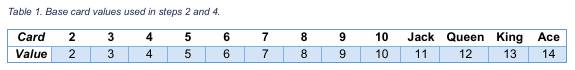


### Question 2.1 [Answer explanation before python solution]

#### Goal: Computing the **expected value (mean)** and **variance** of the **total value** of a card drawn in **Step 2** of the game.

#### Step 1: Understanding the Deck
**4 suits**: Spades, Hearts, Diamonds, and Clubs
**13 ranks**: 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack (11), Queen (12), King (13), Ace (14)
Each rank appears **4 times**

#### Step 2: What Happens in the Game
- Player 1 chooses a suit (1 out of 4).
- Player 2 draws a card at **random** from the full deck.

##### i) Card has a **base value** from the rank (as given above).
##### ii) If the card is **of the same suit** Player 1 called, the value is **doubled**.

 There's a **1 in 4 chance** the drawn card **matches the called suit** → its value is **doubled**.
-There's a **3 in 4 chance** the suit doesn't match → its value remains **unchanged**.

---

#### Step 3: Expected Value and Variance

Let each base card value be denoted by \( v \in \{2, 3, ..., 14\} \).  
There are **4 cards per rank**, so each value is **equally likely**.

####  Expected Value (E[X]):
$$
E[X] = \frac{1}{13} \sum_{v=2}^{14} \left( \frac{1}{4} \cdot 2v + \frac{3}{4} \cdot v \right)
     = \frac{1}{13} \sum_{v=2}^{14} \left( \frac{5}{4}v \right)
     = \frac{5}{4} \cdot \frac{1}{13} \sum_{v=2}^{14} v
$$

$$
\sum_{v=2}^{14} v = 2 + 3 + \dots + 14 = \frac{(14)(14+1)}{2} - \frac{(1)(2)}{2} = 105
$$

$$
E[X] = \frac{5}{4} \cdot \frac{105}{13} = 10.09615...
$$

#### Expected Value of X² (E[X²]):
$$
E[X^2] = \frac{1}{13} \sum_{v=2}^{14} \left( \frac{1}{4} \cdot (2v)^2 + \frac{3}{4} \cdot v^2 \right)
= \frac{1}{13} \sum_{v=2}^{14} \left( \frac{1}{4} \cdot 4v^2 + \frac{3}{4} \cdot v^2 \right)
= \frac{1}{13} \sum_{v=2}^{14} \left( \frac{7}{4}v^2 \right)
= \frac{7}{4} \cdot \frac{1}{13} \sum_{v=2}^{14} v^2
$$

$$
\sum_{v=2}^{14} v^2 = \sum_{v=1}^{14} v^2 - 1^2 = \frac{14 \cdot 15 \cdot 29}{6} - 1 = 1014 - 1 = 1013
$$

$$
E[X^2] = \frac{7}{4} \cdot \frac{1013}{13} = 136.423...
$$

#### Variance:

$$
Var(X) = E[X^2] - (E[X])^2 = 136.5 - (10.09615)^2 \approx 136.5 - 101.9339 = 34.5661
$$

#### Final Answers:
Expected Value (Mean) ≈ **10.10**

Expected Value of X^2 ≈ **136.423**

Variance ≈ **34.5661**

In [ ]:
import numpy as np

# List of base card values from 2 to Ace (14)
base_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

# Expected value for each card: (1/4 * 2v) + (3/4 * v) = (5/4) * v
expected_values = (5/4) * base_values

# Mean: average over all expected values
mean = np.mean(expected_values)

# For E[X^2]: expected squared value: (1/4)*(2v)^2 + (3/4)*(v^2) = (7/4)*v^2
expected_squares = (7/4) * base_values**2
mean_square = np.mean(expected_squares)

# Equation of the Variance
variance = mean_square - mean**2

# Printing the results
print(f"Expected Value (Mean): {mean:.4f}")
print(f"Expected Value of X^2: {mean_square:.4f}")
print(f"Variance: {variance:.4f}")


### Question 2.2

Your friend comes up with a strategy. When they are player 2, if they draw a card in step 2 that is the same as the suit called by player 1 in step 1, they flip a coin, then say "higher" or "lower" in step 3 if the coin lands heads or tails repectively.


### 2.2a) [Manual Solution]

For a particular game, given that they called "higher" in step 3, calculate the probability that they drew the same suit as called in step 1. Reference the methods used in the lectures.

Target: Find the probability that player 2 drew the same suit as player 1 given that player 2 said "higher"

Defining:
A : Event that player 2 drew the same suit as player 1.
B: Event that player 2 says "higher"

Goal: We want P(A|B)

Using **Bayes' Theorem** from lectures:

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$
or 
$$
 P(Same Suit \mid Said "Higher") = \frac{P(Said "Higher" \mid Same Suit) \cdot P(Same Suit)}{P(Said "Higher")}
 $$
1. Probability that Player 2 drew the same suit [P(A)]
   $$
   P(A) = \frac{1}{4}
   $$
2. Probability that player 2 says "higher" given they drew the **same suit** [P(B|A)]
   $$
   P(B \mid A) = \frac{1}{2}
   $$
3. Probability that player 2 says "higher" given they drew a **different suit** [P(B|A^c)]
   $$
   P(B \mid A^c) = 0
   $$
4. Probability of drawing a different suit [P(A^c)]
   $$
   P(A^c) = 1 - \frac{1}{4} = \frac{3}{4}
   $$
5. Total probability that player 2 says "higher"
   $$
   P(B) = P(B \mid A) \cdot P(A) + P(B \mid A^c) \cdot P(A^c) = \frac{1}{2} \cdot \frac{1}{4} + 0 \cdot \frac{3}{4} = \frac{1}{8}
   $$
6. Final calculation [P(A|B)]
   $$
   P(A \mid B) = \frac{\frac{1}{2} \cdot \frac{1}{4}}{\frac{1}{8}} = \frac{\frac{1}{8}}{\frac{1}{8}} = 1
   $$

##### To interpret

If the friend says "higher" then it is a 100% certainty that they drew a card of the called suit.
##### Reason
Saying "higher" happens only **if**: The friend drew a matching suit and the coin flip landed heads

#### 2.2b) [Python Solution]

Create a game-simulating function to test this strategy:

i) Define a function that returns a tuple of three random numbers corresponding to: (a) the suit called in Step 1, (b) the card drawn in Step 2, and (c) the card drawn in Step 4. The cards in Steps 2 and 4 cannot be the same

ii) Use this same function to simulate 1000 games and evaluate how many times your friend's strategy would have been successful. Is their strategy a good idea compared to randomly choosing every time or not?




In [ ]:

# Simulation of one round of card game

import random

def draw_card(exclude = None):
    suits = ['clubs', 'spades', 'hearts', 'diamonds']
    ranks = list(range(2, 15)) # 2 to 14 where 11=J, 12=Q, 13=K, and 14=A
    deck = [(s, r) for s in suits for r in ranks]

    #If card needs to be excluded
    if exclude:
        deck = [card for card in deck if card != exclude]

    return random.choice(deck)

def simulate_round():
    suits = ['clubs', 'spades', 'hearts', 'diamonds']

    # Step 1: Player 1 calls a suit
    suit_called = random.choice(suits)

    # Step 2: Player 2 draws a card
    card_p2 = draw_card()

    # Step 4: Player 1 draws a different card
    card_p1 = draw_card(exclude = card_p2)
    
    # Returning the tuple
    return (suit_called, card_p2, card_p1)

# Example of usage
result = simulate_round()

print(f"Suit called by Player 1: {result[0]}")
print(f"Player 2's drawn card: {result[1][1]} of {result[1][0]}")
print(f"Player 1's drawn card: {result[2][1]} of {result[2][0]}")

In [ ]:

import random

def draw_card(exclude=None):
    suits = ['clubs', 'spades', 'hearts', 'diamonds']
    ranks = list(range(2, 15))  # 2 to 14 where 11=J, 12=Q, 13=K, and 14=A
    deck = [(s, r) for s in suits for r in ranks]

    # If a card needs to be excluded, exclude it directly here
    if exclude:
        deck = [card for card in deck if card != exclude]

    return random.choice(deck)

def simulate_round():
    # Step 1: Player 1 calls a suit
    suits = ['clubs', 'spades', 'hearts', 'diamonds']
    suit_called = random.choice(suits)

    # Step 2: Player 2 draws a card
    card_p2 = draw_card()

    # Step 4: Player 1 draws a different card
    card_p1 = draw_card(exclude=card_p2)

    # Return the suit called, Player 2's card, and Player 1's card
    return (suit_called, card_p2, card_p1)

def evaluate_strategy(num_games=1000):
    strategy_successes = 0
    random_strategy_successes = 0

    for _ in range(num_games):
        # Simulate one round of the game
        suit_called, card_p2, card_p1 = simulate_round()

        # Friend's strategy:
        # If Player 2's card suit matches the suit called by Player 1
        if card_p2[0] == suit_called:
            # Flip a coin to call "higher" or "lower"
            coin_flip = random.choice(['higher', 'lower'])
            if coin_flip == 'higher':
                if card_p2[1] > card_p1[1]:  # Player 2 wins if their card is higher
                    strategy_successes += 1
            else:  # "lower"
                if card_p2[1] < card_p1[1]:  # Player 2 wins if their card is lower
                    strategy_successes += 1
        else:
            # Random strategy: call "higher" or "lower" randomly
            random_call = random.choice(['higher', 'lower'])
            if random_call == 'higher' and card_p2[1] > card_p1[1]:
                random_strategy_successes += 1
            elif random_call == 'lower' and card_p2[1] < card_p1[1]:
                random_strategy_successes += 1

    return strategy_successes, random_strategy_successes

# Simulate 1000 games and evaluate the success of the strategy
num_games = 1000
strategy_successes, random_strategy_successes = evaluate_strategy(num_games)

# Output the results
print(f"Friend's strategy success rate: {strategy_successes / num_games * 100:.2f}%")
print(f"Random strategy success rate: {random_strategy_successes / num_games * 100:.2f}%")


##### To Conclude:
The success rate of both the friend's strategy and a random strategy is displayed by the code output.

The output shows that the random strategy success rate is superior to the Friend's.